In [57]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
os.listdir()

['.ipynb_checkpoints', 'preprocessed_700.csv', 'Untitled.ipynb']

In [23]:
df_preprocessed_700 = pd.read_csv('preprocessed_700.csv')

In [24]:
df_preprocessed_700.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall


In [25]:
df_preprocessed_700.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             23800 non-null  object 
 1   Fertility        23800 non-null  object 
 2   Photoperiod      23800 non-null  object 
 3   N-P-K Ratio      23800 non-null  object 
 4   Temperature      23800 non-null  float64
 5   Rainfall         23800 non-null  float64
 6   pH               23800 non-null  float64
 7   Light_Hours      23800 non-null  float64
 8   Light_Intensity  23800 non-null  float64
 9   Rh               23800 non-null  float64
 10  Nitrogen         23800 non-null  float64
 11  Phosphorus       23800 non-null  float64
 12  Potassium        23800 non-null  float64
 13  Yield            23800 non-null  float64
 14  Category_pH      23800 non-null  object 
 15  Soil_Type        23800 non-null  object 
 16  Season           23800 non-null  object 
dtypes: float64(1

In [36]:
print("Summary Statistics:")
display(df_preprocessed_700.describe())

Summary Statistics:


,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield (kg/m2)
count,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000
mean,21.978474,1048.775960,6.238701,10.708792,428.144454,75.633995,143.077870,97.729048,178.380374,1.779295
std,4.382708,372.439104,0.836081,2.705223,210.594866,19.199301,60.180291,69.558537,90.676584,1.450370
min,9.355908,409.927161,2.940351,5.044913,66.000791,29.877266,40.077805,13.155191,34.982329,0.077021
25%,18.802279,756.618244,6.029328,7.479604,261.001150,55.986653,107.077056,47.208312,117.856142,0.630992
50%,21.424851,995.841172,6.431525,12.016017,403.601654,87.133888,140.252517,70.558185,174.455784,1.591622
75%,24.725214,1204.581048,6.691918,13.026169,573.610828,92.460093,163.848126,129.055964,223.645110,2.361809
max,39.913892,2786.343754,8.219020,16.721979,1028.679529,99.927439,409.639573,360.043619,579.953931,6.661924


In [37]:
# Check for missing values
print("Missing Values:")
print(df_preprocessed_700.isnull().sum())

Missing Values:
Name               0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Category_pH        0
Soil_Type          0
Season             0
Yield (kg/m2)      0
dtype: int64


In [26]:
df_preprocessed_700.columns.to_list()

['Name',
 'Fertility',
 'Photoperiod',
 'N-P-K Ratio',
 'Temperature',
 'Rainfall',
 'pH',
 'Light_Hours',
 'Light_Intensity',
 'Rh',
 'Nitrogen',
 'Phosphorus',
 'Potassium',
 'Yield',
 'Category_pH',
 'Soil_Type',
 'Season']

In [27]:
df_preprocessed_700.rename(columns = {'Yield': 'Yield (t/ha)'}, inplace = True)

In [28]:
df_preprocessed_700.head(5)

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield (t/ha),Category_pH,Soil_Type,Season
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall


In [29]:
# convert Yield's unit from (t/ha) to (kg/m2)

df_preprocessed_700['Yield (kg/m2)'] = df_preprocessed_700['Yield (t/ha)'] * 0.1 

In [30]:
df_preprocessed_700.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield (t/ha),Category_pH,Soil_Type,Season,Yield (kg/m2)
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,12.847482,low_acidic,Sandy Loam,Fall,1.284748
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,13.894292,neutral,Sandy Loam,Fall,1.389429
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,13.372204,low_acidic,Sandy Loam,Fall,1.337220
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,11.801568,neutral,Sandy Loam,Spring,1.180157
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,10.660521,neutral,Sandy Loam,Fall,1.066052


In [31]:
df_preprocessed_700.drop(['Yield (t/ha)'], axis = 1, inplace = True)

In [32]:
df_preprocessed_700.head()

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season,Yield (kg/m2)
0,Apple,High,Day Neutral,10:10:10,21.063204,1932.402709,6.567764,12.716549,860.189066,92.677579,89.266502,40.330099,180.635740,low_acidic,Sandy Loam,Fall,1.284748
1,Apple,High,Day Neutral,10:10:10,19.511305,1589.295994,6.784538,13.544560,797.660760,92.293923,92.808150,37.131922,179.042979,neutral,Sandy Loam,Fall,1.389429
2,Apple,High,Day Neutral,10:10:10,23.045662,1269.789133,6.619155,12.330668,910.861369,91.798926,84.248590,38.693498,163.604138,low_acidic,Sandy Loam,Fall,1.337220
3,Apple,High,Short Day Period,10:10:10,17.986016,1944.180144,6.638623,12.965340,922.725203,92.742710,84.780429,43.950592,173.881606,neutral,Sandy Loam,Spring,1.180157
4,Apple,High,Day Neutral,10:10:10,23.775354,1790.352815,6.654898,12.895817,821.411003,90.981530,91.197126,45.564470,174.324935,neutral,Sandy Loam,Fall,1.066052


# Yield Prediction

In [40]:
# Separate features and target variable
X = df_preprocessed_700.drop(columns=['Yield (kg/m2)', 'Name'])
y = df_preprocessed_700['Yield (kg/m2)']

In [41]:
X.shape

(23800, 15)

In [44]:
df_preprocessed_700['N-P-K Ratio'].unique()

# these are string values let's treat them as a categorical feature

array(['10:10:10', '05:10:05', '20:10:20', '10:10:05', '06:06:06',
       '75:37.5:37.5', '05:10:10', '22:12:13', '08:15:36', '13:13:13'],
      dtype=object)

In [45]:
# Identify numerical and categorical columns
numerical_features = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 
                      'Phosphorus', 'Potassium']
categorical_features = ['Photoperiod', 'Fertility', 'Category_pH', 'Soil_Type', 'Season', 'N-P-K Ratio']

In [48]:
# Preprocessing for numerical data: Standardization
numerical_transformer = StandardScaler()

In [49]:
# Preprocessing for categorical data: One-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [50]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

In [51]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Rainfall',
                                                   'pH', 'Light_Hours',
                                                   'Light_Intensity', 'Rh',
                                                   'Nitrogen', 'Phosphorus',
                                                   'Potassium']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Photoperiod', 'Fertility',
                                                   'Category_pH', 'Soil_Type',
                                                   'Season',
                                                   'N-P-K Ratio'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [55]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.014739961263626056
Root Mean Squared Error: 0.12140824215689006
R-squared: 0.9928402549521346


In [60]:
# # If you want to save the model for future use:
# import joblib
# joblib.dump(pipeline, 'yield_prediction_model.pkl')

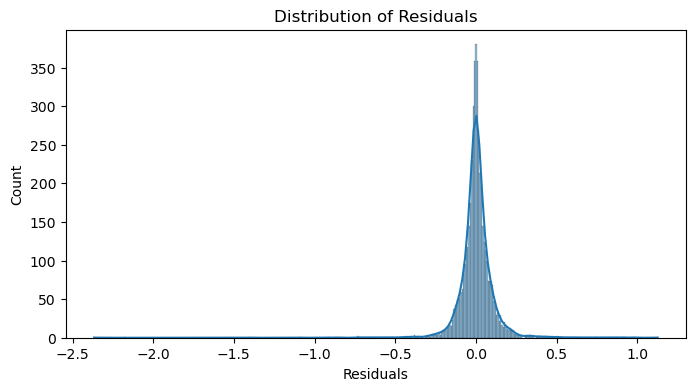

In [83]:
# Function to plot distribution of residuals
def plot_residuals_distribution(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 4))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()
    
# Plotting the distribution of residuals
plot_residuals_distribution(y_test, y_pred)

The above plot shows that our residuals are normally distributed, have mean close to zero so our model is very good.
It is also evident from the Mean Squared Error, Root Mean Squared Error and R-squared values.